In [78]:
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("../../data/exosomes.raw_spectrum_1.csv")

In [80]:
len(df)

8023575

In [81]:
df_filtered = df[(df['WaveNumber'].between(250, 350))]

In [82]:
len(df_filtered)

444570

In [83]:
def area_under_curve(x, y):
    return np.trapz(y, x)

In [84]:
result_df = pd.DataFrame(columns=['SpecID', 'Interval', 'Area'])

In [85]:
SpecID = []
Interval = []
Area = []

for spec_id in df_filtered['SpecID'].unique():
    spec_data = df_filtered[df_filtered['SpecID'] == spec_id]
   # Iterate over intervals of 50
    for i in range(250, 350, 25):
        interval_data = spec_data[(spec_data['WaveNumber'] >= i) & (spec_data['WaveNumber'] < i + 25)]
        
        # Calculate area under the curve for the interval
        area = area_under_curve(interval_data['WaveNumber'], interval_data['Absorbance'])
        
        SpecID.append(spec_id)
        Interval.append(f'{i}-{i+25}')
        Area.append(area)


In [86]:
data = {
    'SpecID':SpecID,
    'Interval':Interval,
    'Area':Area
}

In [87]:
prop = pd.DataFrame(data)

In [88]:
prop

,SpecID,Interval,Area
0,201210-1-00,250-275,58871.637135
1,201210-1-00,275-300,57297.968647
2,201210-1-00,300-325,49199.796523
3,201210-1-00,325-350,46571.143928
4,201210-1-01,250-275,64093.390586
...,...,...,...
12175,210526-3-08,325-350,60191.600289
12176,210526-3-09,250-275,64194.923045
12177,210526-3-09,275-300,65335.391148
12178,210526-3-09,300-325,60740.718100


In [89]:
prop = prop[prop['Area'] != 0]
merged_df = pd.merge(df, prop, on='SpecID', how='inner')
merged_df.drop(columns=['Seq', 'Absorbance', 'WaveNumber', 'SurID'], inplace=True)
merged_df.drop_duplicates(inplace=True)

In [90]:
merged_df

,SpecID,Status,Interval,Area
0,201210-1-00,Normal,250-275,58871.637135
1,201210-1-00,Normal,275-300,57297.968647
2,201210-1-00,Normal,300-325,49199.796523
3,201210-1-00,Normal,325-350,46571.143928
10540,201210-1-01,Normal,250-275,64093.390586
...,...,...,...,...
32073223,210526-3-08,Hyperglycemia,325-350,60191.600289
32083760,210526-3-09,Hyperglycemia,250-275,64194.923045
32083761,210526-3-09,Hyperglycemia,275-300,65335.391148
32083762,210526-3-09,Hyperglycemia,300-325,60740.718100


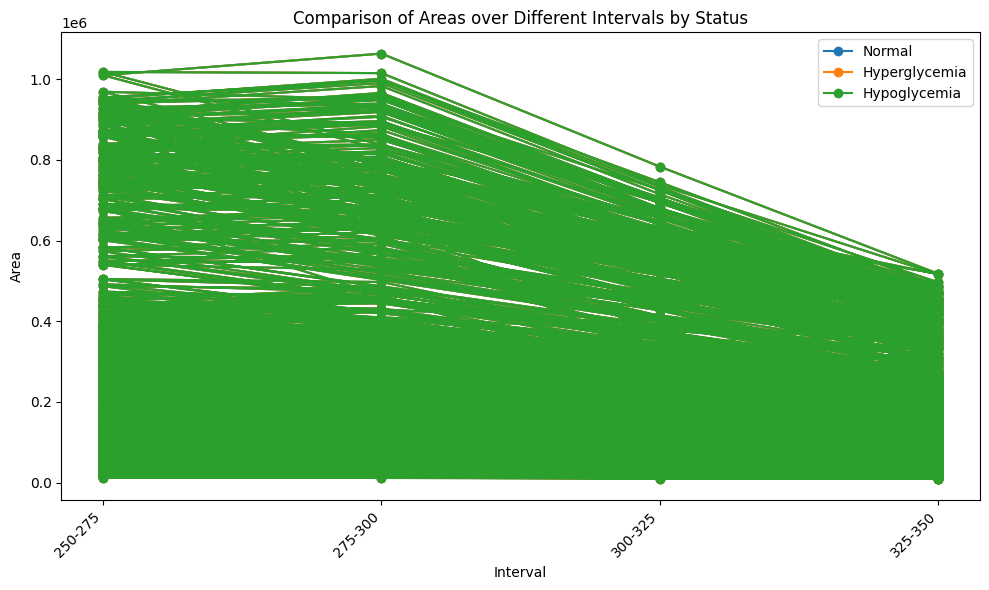

In [154]:
import matplotlib.pyplot as plt

# Assuming merged_df contains the merged DataFrame with columns 'SpecID', 'Interval', 'Area', and 'Status'

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over unique Status values
for status in merged_df['Status'].unique():
    status_data = merged_df[merged_df['Status'] == 'Hypoglycemia']
    
    # Plot the data
    ax.plot(status_data['Interval'], status_data['Area'], marker='o', label=status)

# Set labels and title
ax.set_xlabel('Interval')
ax.set_ylabel('Area')
ax.set_title('Comparison of Areas over Different Intervals by Status')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


In [92]:
df_filtered2 = df[(df['WaveNumber'].between(1500, 1600))]

In [93]:
result_df2 = pd.DataFrame(columns=['SpecID', 'Interval', 'Area'])

In [94]:
SpecID2 = []
Interval2 = []
Area2 = []

for spec_id in df_filtered2['SpecID'].unique():
    spec_data = df_filtered2[df_filtered2['SpecID'] == spec_id]
   # Iterate over intervals of 50
    for i in range(1500, 1600, 25):
        interval_data = spec_data[(spec_data['WaveNumber'] >= i) & (spec_data['WaveNumber'] < i + 25)]
        
        # Calculate area under the curve for the interval
        area = area_under_curve(interval_data['WaveNumber'], interval_data['Absorbance'])
        
        SpecID2.append(spec_id)
        Interval2.append(f'{i}-{i+25}')
        Area2.append(area)

In [95]:
data2 = {
    'SpecID':SpecID2,
    'Interval':Interval2,
    'Area':Area2
}

In [96]:
prop2 = pd.DataFrame(data2)

In [97]:
prop2 = prop2[prop2['Area'] != 0]
merged_df2 = pd.merge(df, prop2, on='SpecID', how='inner')
merged_df2.drop(columns=['Seq', 'Absorbance', 'WaveNumber', 'SurID'], inplace=True)
merged_df2.drop_duplicates(inplace=True)

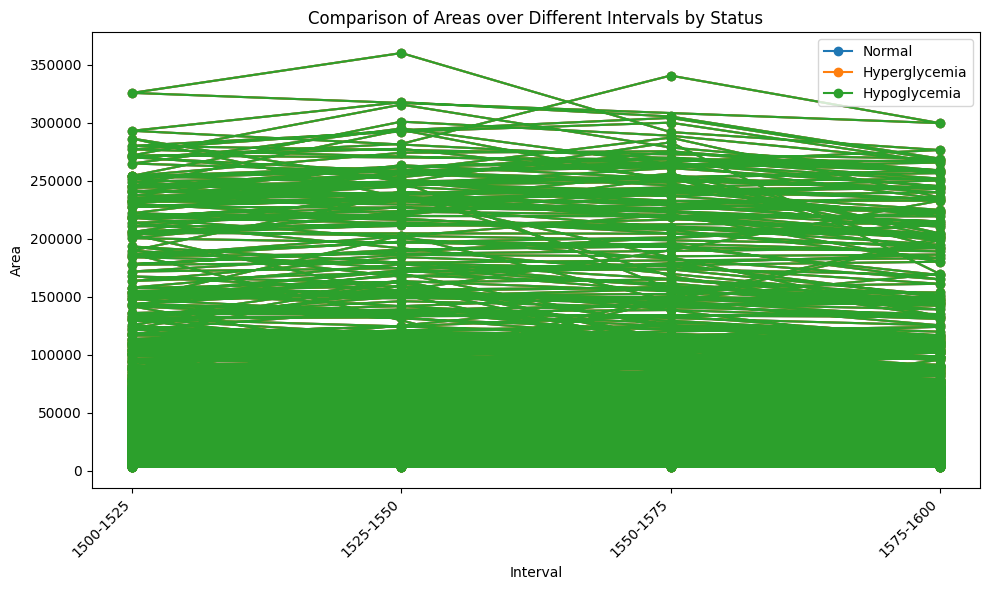

In [129]:
import matplotlib.pyplot as plt

# Assuming merged_df contains the merged DataFrame with columns 'SpecID', 'Interval', 'Area', and 'Status'

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over unique Status values
for status in merged_df2['Status'].unique():
    status_data = merged_df2[merged_df2['Status'] == 'Normal']
    
    # Plot the data
    ax.plot(status_data['Interval'], status_data['Area'], marker='o', label=status)

# Set labels and title
ax.set_xlabel('Interval')
ax.set_ylabel('Area')
ax.set_title('Comparison of Areas over Different Intervals by Status')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


In [141]:
concatenated_df = pd.concat([merged_df, merged_df2], ignore_index=True)

In [142]:
concatenated_df.loc[concatenated_df['Interval'] == '250-275', 'Property'] = (concatenated_df.loc[concatenated_df['Interval'] == '250-275', 'Area'] > 800000).astype(int)
concatenated_df.loc[concatenated_df['Interval'] == '275-300', 'Property'] = (concatenated_df.loc[concatenated_df['Interval'] == '275-300', 'Area'] > 8000000).astype(int)
concatenated_df.loc[concatenated_df['Interval'] == '300-325', 'Property'] = (concatenated_df.loc[concatenated_df['Interval'] == '300-325', 'Area'] > 600000).astype(int)
concatenated_df.loc[concatenated_df['Interval'] == '325-350', 'Property'] = (concatenated_df.loc[concatenated_df['Interval'] == '325-350', 'Area'] > 400000).astype(int)
concatenated_df.loc[concatenated_df['Interval'] == '1500-1525', 'Property'] = (concatenated_df.loc[concatenated_df['Interval'] == '1500-1525', 'Area'] > 350000).astype(int)
concatenated_df.loc[concatenated_df['Interval'] == '1525-1550', 'Property'] = (concatenated_df.loc[concatenated_df['Interval'] == '1525-1550', 'Area'] > 350000).astype(int)
concatenated_df.loc[concatenated_df['Interval'] == '1550-1575', 'Property'] = (concatenated_df.loc[concatenated_df['Interval'] == '1550-1575', 'Area'] > 350000).astype(int)
concatenated_df.loc[concatenated_df['Interval'] == '1575-1600', 'Property'] = (concatenated_df.loc[concatenated_df['Interval'] == '1575-1600', 'Area'] > 350000).astype(int)

In [143]:
concatenated_df

,SpecID,Status,Interval,Area,Property
0,201210-1-00,Normal,250-275,58871.637135,0.0
1,201210-1-00,Normal,275-300,57297.968647,0.0
2,201210-1-00,Normal,300-325,49199.796523,0.0
3,201210-1-00,Normal,325-350,46571.143928,0.0
4,201210-1-01,Normal,250-275,64093.390586,0.0
...,...,...,...,...,...
24355,210526-3-08,Hyperglycemia,1575-1600,51526.700974,0.0
24356,210526-3-09,Hyperglycemia,1500-1525,49453.890427,0.0
24357,210526-3-09,Hyperglycemia,1525-1550,51331.391860,0.0
24358,210526-3-09,Hyperglycemia,1550-1575,51373.733226,0.0


In [144]:
concatenated_df.drop(columns=['Area'], inplace=True)

In [145]:
pivot_df = concatenated_df.pivot_table(index=['SpecID', 'Status'], columns='Interval', values='Property', fill_value=0)

In [146]:
pivot_df.reset_index(inplace=True)

In [147]:
pivot_df

Interval,SpecID,Status,1500-1525,1525-1550,1550-1575,1575-1600,250-275,275-300,300-325,325-350
0,201210-1-00,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,201210-1-01,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,201210-1-02,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,201210-1-03,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,201210-1-04,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3040,210526-3-45,Hyperglycemia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3041,210526-3-46,Hyperglycemia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3042,210526-3-47,Hyperglycemia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,210526-3-48,Hyperglycemia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming pivot_df contains the DataFrame with "SpecID" and "Status" as columns, and other columns as features

# Step 1: Split data into features (X) and target variable (y)
X = pivot_df.drop(columns=['SpecID', 'Status'])
y = pivot_df['Status']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 4: Evaluate the classifier's performance
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4088669950738916


In [149]:
def calculate_metrics(y_test, y_pred):

    # Calculate overall accuracy
    overall_accuracy = accuracy_score(y_test, y_pred)
    print(f"Overall Accuracy: {overall_accuracy}\n")

    # Calculate precision, recall, and F1-score for each class
    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)

    # Show the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

In [150]:
# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculating and printing evaluation metrics
calculate_metrics(y_test, y_pred)

Overall Accuracy: 0.4088669950738916


Classification Report:
               precision    recall  f1-score   support

Hyperglycemia       0.82      0.09      0.17       194
 Hypoglycemia       0.83      0.05      0.10       193
       Normal       0.38      1.00      0.55       222

     accuracy                           0.41       609
    macro avg       0.68      0.38      0.27       609
 weighted avg       0.66      0.41      0.29       609


Confusion Matrix:
[[ 18   1 175]
 [  4  10 179]
 [  0   1 221]]
